In [ ]:
## Reproduce the figures in kmap paper
### all the read files could be found in the dir of /data

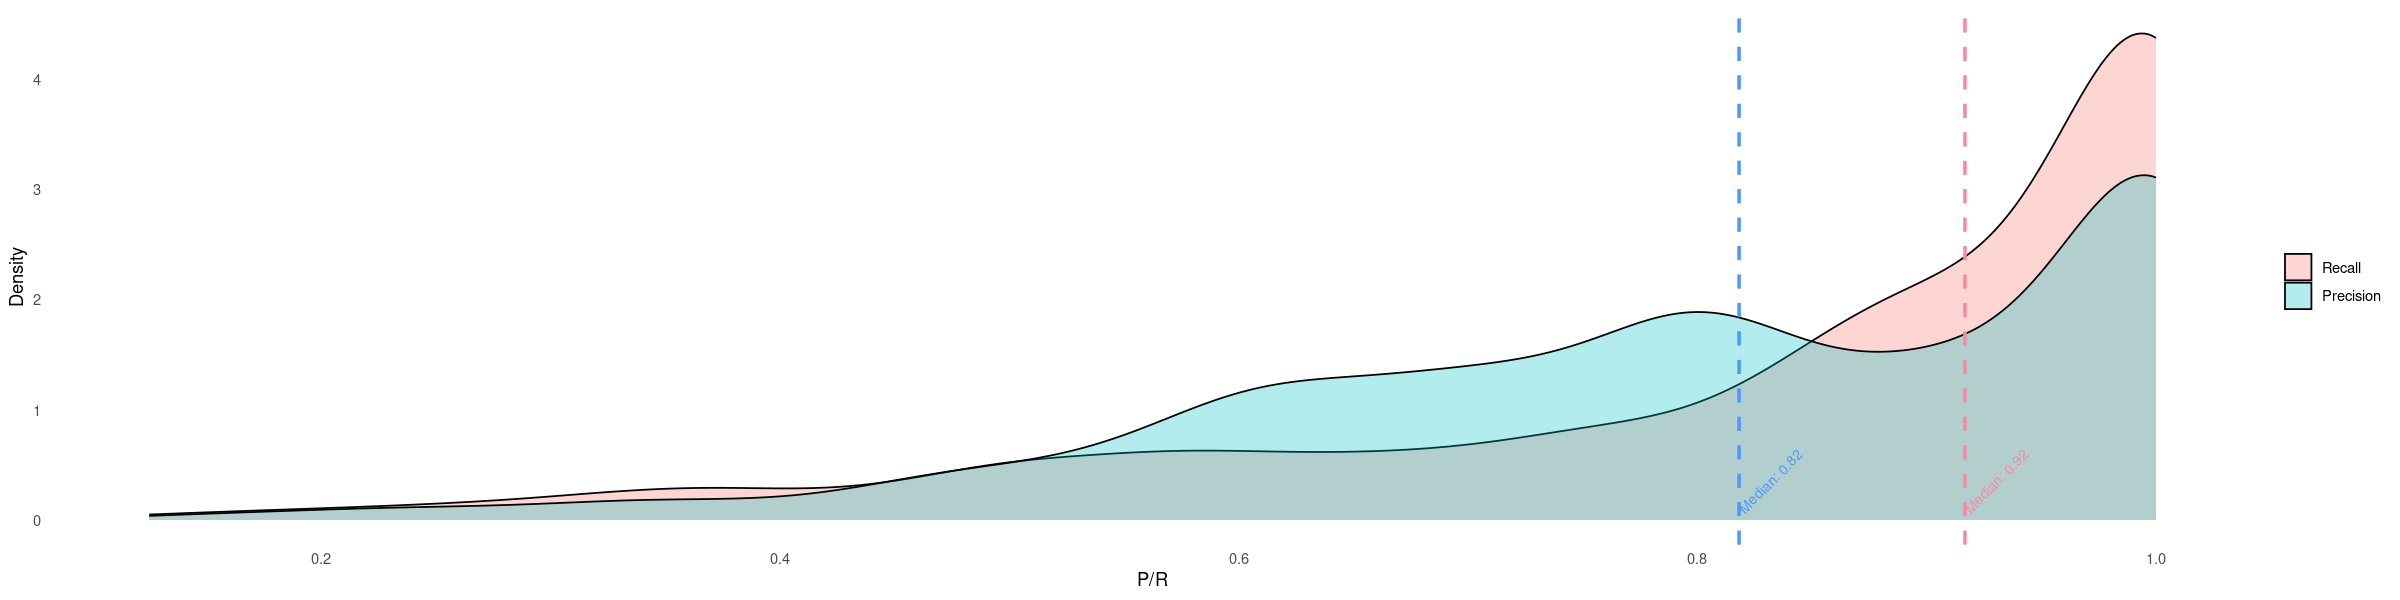

In [14]:
# Load required libraries
library(ggplot2)
library(readr)
library(reshape2)
library(dplyr) # Ensure dplyr library is loaded


# Load the data
df <- read_csv('results_pre_rec.csv',show_col_types = FALSE)

# Convert the data from wide to long format, including only Recall and Precision columns
long_df <- melt(df, measure.vars = c("Recall", "Precision"))

# Use dplyr to calculate the median for each variable and prepare text labels
medians <- long_df %>%
  group_by(variable) %>%
  summarize(median_value = median(value)) %>%
  ungroup() # Ungroup after calculation

# To interchange median line colors, we create a color mapping
color_mapping <- setNames(c("#4D98FF", "#FB88A1"), levels(medians$variable))

# Plot density graphs for Recall and Precision, remove background, and annotate with median values. Median lines not shown in legend
p <- ggplot(long_df, aes(x=value, fill=variable)) +
  geom_density(alpha=0.3) +
  labs(x = "P/R", y = "Density") +
  theme_minimal() +
  theme(panel.background = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank()) +
  geom_vline(data = medians, aes(xintercept = median_value), color = ifelse(medians$variable == "Recall", color_mapping["Precision"], color_mapping["Recall"]), linetype = "dashed", size = 1, show.legend = FALSE) +
  geom_text(data = medians, aes(x = median_value, y = 0, label = paste('Median:', round(median_value, 2))), vjust = 0, hjust = -0.1, size = 3, angle = 45, color = ifelse(medians$variable == "Recall", color_mapping["Precision"], color_mapping["Recall"]), show.legend = FALSE)  +
  scale_color_manual(values = c("Recall" = "#4D98FF", "Precision" = "#FB88A1")) + scale_x_continuous(breaks = seq(from = 0, to = 1, by = 0.2)) + guides(fill=guide_legend(title=NULL))

# Display the plot
print(p)


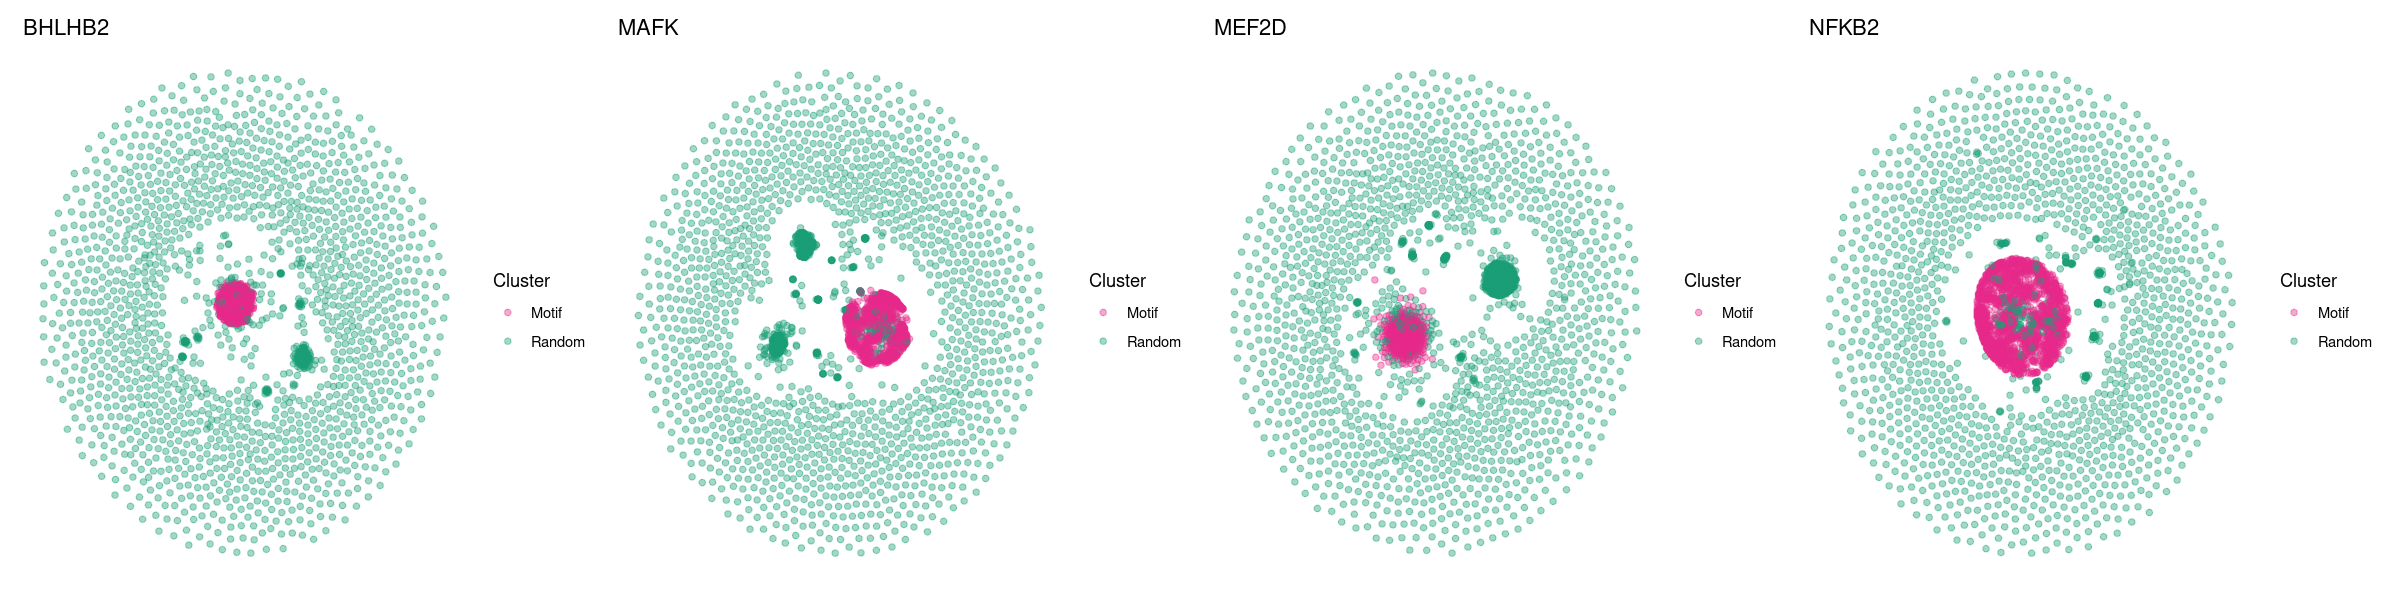

In [6]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(patchwork) # For arranging plots

# List of transcription factors
transcription_factors <- c("BHLHB2","MAFK","MEF2D","NFKB2")
motif_mappings <- list(BHLHB2 = 1,MAFK = 2,MEF2D=1,NFKB2="1")

# Initialize list for storing plots
plot_list <- list()

# Loop through each transcription factor
for (tf in transcription_factors) {
  # Construct paths for the data files
  data_strings_path <- paste0(tf, "_sample_kmer_init.csv")
  data_coordinates_path <- paste0(tf, "_ld_data.csv")
  data_labels_path <- paste0(tf, "_sample_labels.csv")
  
  # Read the data
  data_strings <- read.csv(data_strings_path, header = FALSE, col.names = c("string"))
  data_coordinates <- read.csv(data_coordinates_path, header = FALSE)
  data_labels <- read.csv(data_labels_path, header = FALSE, col.names = c("label"))
  
  # Transpose coordinate data and convert to a data frame
  transposed_data_coordinates <- t(data_coordinates) %>% as.data.frame()
  colnames(transposed_data_coordinates) <- c("x_coord", "y_coord")
  
  # Combine the data
  data_combined <- cbind(data_strings, transposed_data_coordinates, data_labels)
  data_combined$label <- as.factor(data_combined$label)
  
  # Define color mapping
  palette <- brewer.pal(7, "Dark2")
  color_mapping <- c("Motif" = palette[4], "Random" = palette[1])
  # Process the data with updated condition
  # Customize data processing based on the transcription factor
  # Customize data processing based on the transcription factor
  motif_label <- motif_mappings[[tf]]
  data_ge <- data_combined %>%
    mutate(label = case_when(
      label == motif_label ~ "Motif",
      TRUE ~ "Random"  # All other values are labeled as "Random"
    ))
  
  # Generate scatter plot and add to the list
  plot_list[[tf]] <- ggplot(data_ge, aes(x = x_coord, y = y_coord, color = label)) +  
    geom_point(alpha = 0.4) +
    theme_minimal() +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line = element_blank(),
          axis.text.x = element_blank(),
          axis.text.y = element_blank(),
          axis.ticks = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_blank()) +
    labs(color = "Cluster") +
    scale_color_manual(values = color_mapping) +
    ggtitle(tf)  # Add the transcription factor name as the plot title
}

# Arrange and display the plots horizontally, for example using patchwork
composite_image <- wrap_plots(plot_list, ncol = length(transcription_factors))

options(repr.plot.width=20, repr.plot.height=5) 
print(composite_image)

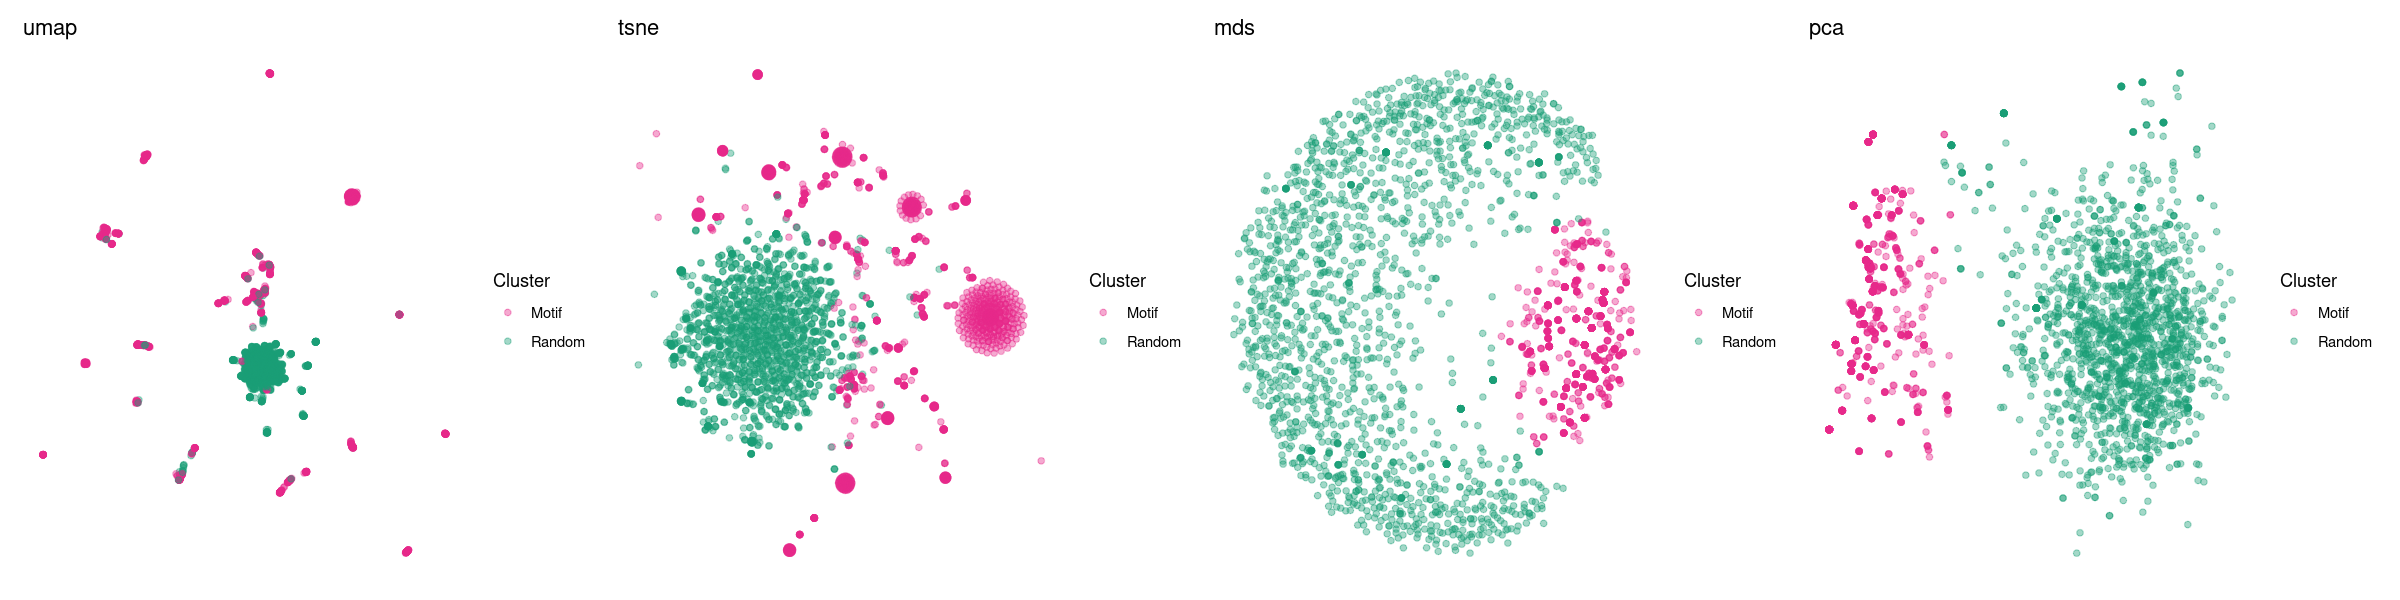

In [9]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(patchwork) # For arranging plots

# List of transcription factors
transcription_factors <- c("umap","tsne","mds","pca")

# Initialize list for storing plots
plot_list <- list()

# Loop through each transcription factor
for (tf in transcription_factors) {

  data_coordinates_path <- paste0(tf, "_ld_data.csv")

  # Read the data
  data_strings <- read.csv("NFKB2_sample_kmer_init.csv", header = FALSE, col.names = c("string"))
  data_coordinates <- read.csv(data_coordinates_path, header = TRUE)
  data_labels <- read.csv("NFKB2_sample_labels.csv", header = FALSE, col.names = c("label"))
  
  data_selected <- data_coordinates[, (ncol(data_coordinates) - 1):ncol(data_coordinates)]
  
  # rename 
  colnames(data_selected) <- c("x_coord", "y_coord")  
  
  
  data_ge = cbind(data_strings, data_selected,data_labels)
  data_ge$label <- as.factor(data_ge$label)
  
  # Define color mapping
  palette <- brewer.pal(7, "Dark2")
  color_mapping <- c("Motif" = palette[4], "Random" = palette[1])
  data_ge <- data_ge %>%
    mutate(label = case_when(
      label == 1 ~ "Motif",
      label == 2 ~ "Random"
  ))
  
  # Generate scatter plot and add to the list
  plot_list[[tf]] <- ggplot(data_ge, aes(x = x_coord, y = y_coord, color = label)) +  
    geom_point(alpha = 0.4) +
    theme_minimal() +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line = element_blank(),
          axis.text.x = element_blank(),
          axis.text.y = element_blank(),
          axis.ticks = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_blank()) +
    labs(color = "Cluster") +
    scale_color_manual(values = color_mapping) +
    ggtitle(tf)  # Add the transcription factor name as the plot title
}

# Arrange and display the plots horizontally
composite_image <- wrap_plots(plot_list, ncol = length(transcription_factors))

options(repr.plot.width=20, repr.plot.height=5) 
print(composite_image)